In [1]:
import os
os.chdir(r'D:\D\Edureka\Edureka - 24 June - Python\Class 14')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Mall_Customers.csv')

In [4]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
x = data.iloc[:, 3:5].values

In [6]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

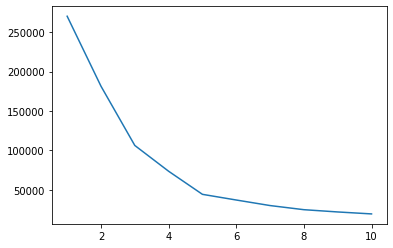

In [7]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)

In [8]:
kmeans = KMeans(n_clusters=5, init='k-means++')
y_kmeans = kmeans.fit_predict(x)

In [9]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [10]:
pd.concat([data, pd.DataFrame(y_kmeans)], axis=1)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),0
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


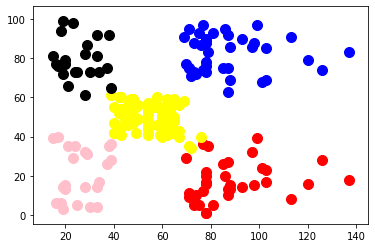

In [11]:
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0,1], s = 100, c = 'red')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1,1], s = 100, c = 'yellow')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2,1], s = 100, c = 'blue')
plt.scatter(x[y_kmeans==3, 0], x[y_kmeans==3,1], s = 100, c = 'black')
plt.scatter(x[y_kmeans==4, 0], x[y_kmeans==4,1], s = 100, c = 'pink')

In [13]:
from sklearn.metrics import silhouette_score
print(silhouette_score(x, y_kmeans))

0.553931997444648


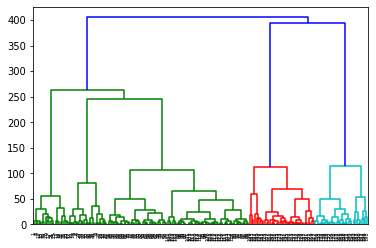

In [14]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))

In [16]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)

In [17]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [18]:
pd.concat([data, pd.DataFrame(y_hc)], axis=1)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),0
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


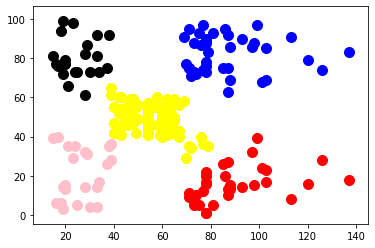

In [19]:
plt.scatter(x[y_hc==0, 0], x[y_hc==0,1], s = 100, c = 'red')
plt.scatter(x[y_hc==1, 0], x[y_hc==1,1], s = 100, c = 'yellow')
plt.scatter(x[y_hc==2, 0], x[y_hc==2,1], s = 100, c = 'blue')
plt.scatter(x[y_hc==3, 0], x[y_hc==3,1], s = 100, c = 'black')
plt.scatter(x[y_hc==4, 0], x[y_hc==4,1], s = 100, c = 'pink')

In [20]:
from sklearn.metrics import silhouette_score
print(silhouette_score(x, y_hc))

0.5529945955148897


In [21]:
import os
os.chdir(r'D:\D\Edureka\Edureka - 24 June - Python\Class 15')

In [23]:
dataset = pd.read_excel('Online_Retail.xlsx')

In [25]:
len(dataset)

541909

In [27]:
dataset['Description'] = dataset['Description'].str.strip()

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532621 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    532621 non-null  object        
 1   StockCode    532621 non-null  object        
 2   Description  531166 non-null  object        
 3   Quantity     532621 non-null  int64         
 4   InvoiceDate  532621 non-null  datetime64[ns]
 5   UnitPrice    532621 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      532621 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.6+ MB


In [31]:
dataset['InvoiceNo'] = dataset['InvoiceNo'].astype('str')

In [32]:
dataset = dataset[~dataset['InvoiceNo'].str.contains('C')]

In [35]:
len(dataset)

532621

In [36]:
basket = (dataset[dataset['Country']=='France'].groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))

In [55]:
basket

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
basket_sets.to_csv('basket.csv')

In [43]:
def encode_units(x):
    if x<=0:
        return 0 
    if x>=1:
        return 1
basket_sets = basket.applymap(encode_units)

In [45]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [52]:
frequent_itms = apriori(basket_sets, min_support=0.07, use_colnames=True)
rules = association_rules(frequent_itms, metric='lift', min_threshold=8)

In [53]:
len(rules)

6

In [54]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
2,"(ALARM CLOCK BAKELIKE RED, POSTAGE)",(ALARM CLOCK BAKELIKE GREEN),0.086735,0.096939,0.071429,0.823529,8.495356,0.063021,5.117347
3,"(POSTAGE, ALARM CLOCK BAKELIKE GREEN)",(ALARM CLOCK BAKELIKE RED),0.084184,0.094388,0.071429,0.848485,8.989353,0.063483,5.977041
4,(ALARM CLOCK BAKELIKE RED),"(POSTAGE, ALARM CLOCK BAKELIKE GREEN)",0.094388,0.084184,0.071429,0.756757,8.989353,0.063483,3.765023
5,(ALARM CLOCK BAKELIKE GREEN),"(ALARM CLOCK BAKELIKE RED, POSTAGE)",0.096939,0.086735,0.071429,0.736842,8.495356,0.063021,3.470408


In [56]:
import os
os.chdir(r'D:\D\Edureka\Edureka - 24 June - Python\Class 17')

In [57]:
data=pd.read_csv('Social_Network_Ads.csv')

In [60]:
x=data.iloc[:,[2,3]].values

In [61]:
y = data.iloc[:,4].values

In [62]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [64]:
x

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=10)

In [66]:
from sklearn.svm import SVC
classifier_svm_sig = SVC(kernel='sigmoid')
classifier_svm_sig.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [68]:
y_pred = classifier_svm_sig.predict(x_test)

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)
accuracy_score(y_test,y_pred)

0.7416666666666667

In [72]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_svm_sig, X=x_train, y=y_train, cv=10)

In [75]:
accuracies

array([0.64285714, 0.71428571, 0.64285714, 0.75      , 0.82142857,
       0.64285714, 0.71428571, 0.53571429, 0.67857143, 0.75      ])

In [76]:
from sklearn.svm import SVC
classifier_svm_rbf = SVC(kernel='rbf')
classifier_svm_rbf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [77]:
from sklearn.model_selection import cross_val_score
accuracies_rbf = cross_val_score(estimator=classifier_svm_rbf, X=x_train, y=y_train, cv=10)

In [79]:
accuracies_rbf.mean()

0.9107142857142858

In [80]:
accuracies_rbf.std()

0.06633634150359541

In [81]:
accuracies.std()

0.075

In [82]:
#Grid Search

In [83]:
x_train

array([[ 1.08359645, -0.99084367],
       [ 0.89257019, -1.46068138],
       [ 1.17910958, -0.99084367],
       [-0.25358736,  0.21311545],
       [-0.63563988, -0.34481683],
       [ 0.41500455, -0.16862769],
       [ 0.51051768,  1.74008799],
       [ 0.70154394, -1.40195167],
       [-0.82666613, -0.78528968],
       [ 1.94321462,  0.74168287],
       [ 0.31949142, -0.55037082],
       [-0.25358736,  0.80041258],
       [-0.82666613,  0.15438573],
       [ 0.22397829, -0.37418169],
       [ 0.31949142, -1.16703281],
       [ 1.84770149,  0.12502088],
       [ 0.70154394, -1.1083031 ],
       [-0.44461362, -1.22576253],
       [-0.25358736,  2.26865541],
       [-0.25358736, -0.25672226],
       [ 0.12846516,  0.09565602],
       [ 1.08359645,  0.56549373],
       [ 0.98808332, -1.16703281],
       [ 1.27462271,  2.23929055],
       [-1.01769239,  0.77104772],
       [ 1.5611621 ,  1.00596657],
       [-0.25358736, -1.25512738],
       [ 0.31949142,  0.06629116],
       [ 0.98808332,

In [84]:
y_train

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [86]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=5)
classifier_knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [90]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_neighbors':[7,11,13]}]
grid_search = GridSearchCV(estimator=classifier_knn, 
                          param_grid=parameters,
                           scoring='accuracy',
                          cv=10)
grid_search = grid_search.fit(x_train,y_train)
best_accuracy = grid_search.best_score_
best_paramter = grid_search.best_params_

In [91]:
best_paramter

{'n_neighbors': 11}

In [92]:
best_accuracy

0.9

In [96]:
from sklearn.model_selection import GridSearchCV
parameters = [{'kernel':['poly','sigmoid','linear']}]
grid_search = GridSearchCV(estimator=classifier_svm_rbf, 
                          param_grid=parameters,
                           scoring='accuracy',
                          cv=10)
grid_search = grid_search.fit(x_train,y_train)
best_accuracy = grid_search.best_score_
best_paramter = grid_search.best_params_

In [94]:
best_accuracy

0.9107142857142858

In [98]:
best_paramter

{'kernel': 'linear'}

In [99]:
import os
os.chdir(r'D:\D\Edureka\Edureka - 24 June - Python\Class 16')

In [100]:
data = pd.read_csv('Bank-data.csv')

In [103]:
data['Churn'] = data['Churn'].astype('category')
data['Churn'] = data['Churn'].cat.codes

In [105]:
data

,Index,interest_rate,credit,Gender,previous,duration,Churn
0,0,1.334,0,1,0,117,0
1,1,0.767,0,0,1,274,1
2,2,4.858,0,1,0,167,0
3,3,4.120,0,0,0,686,1
4,4,4.856,0,1,0,159,0
...,...,...,...,...,...,...,...
513,513,1.334,0,1,0,204,0
514,514,0.861,0,0,1,806,1
515,515,0.879,0,0,0,290,0
516,516,0.877,0,0,1,473,1


In [106]:
x = data.iloc[:, 0:6].values

In [107]:
x

array([[  0.   ,   1.334,   0.   ,   1.   ,   0.   , 117.   ],
       [  1.   ,   0.767,   0.   ,   0.   ,   1.   , 274.   ],
       [  2.   ,   4.858,   0.   ,   1.   ,   0.   , 167.   ],
       ...,
       [515.   ,   0.879,   0.   ,   0.   ,   0.   , 290.   ],
       [516.   ,   0.877,   0.   ,   0.   ,   1.   , 473.   ],
       [517.   ,   4.965,   0.   ,   0.   ,   0.   , 142.   ]])

In [108]:
y = data.iloc[:,6].values

In [109]:
y

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [111]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
y_pred = logmodel.predict(x_test)

In [115]:
confusion_matrix(y_test,y_pred)

array([[63, 16],
       [12, 65]], dtype=int64)

In [116]:
accuracy_score(y_test, y_pred)

0.8205128205128205

In [117]:
x_train

array([[306.   ,   4.856,   0.   ,   1.   ,   0.   , 216.   ],
       [345.   ,   0.883,   0.   ,   0.   ,   1.   , 219.   ],
       [218.   ,   1.423,   0.   ,   0.   ,   0.   , 207.   ],
       ...,
       [  6.   ,   4.962,   0.   ,   0.   ,   0.   , 337.   ],
       [ 48.   ,   1.281,   0.   ,   1.   ,   0.   , 172.   ],
       [294.   ,   0.898,   0.   ,   0.   ,   0.   , 308.   ]])

In [127]:
from sklearn.decomposition import PCA
#Principal component analysis
pca = PCA(n_components=2)
x_train_pca_2 = pca.fit_transform(x_train)
x_test_pca_2 = pca.fit_transform(x_test)

In [125]:
pd.DataFrame(x_train_pca_2)

,0,1
0,-157.948659,-63.230564
1,-152.668356,-101.989754
2,-172.087662,24.089483
3,116.608678,-252.471941
4,106.980646,-242.019676
...,...,...
357,-312.982584,-118.407376
358,98.575438,123.116907
359,-54.730898,243.342211
360,-216.986215,191.747455


In [132]:
1-sum(pca.explained_variance_ratio_)

2.4162390723447835e-05

In [128]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train_pca_2,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [129]:
y_pred = logmodel.predict(x_test_pca_2)

In [130]:
accuracy_score(y_test, y_pred)

0.7115384615384616